In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

# Load dataset

In [2]:
(x_train , y_train) , (x_test , y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(keras.datasets.fashion_mnist.load_data.__doc__)

Loads the Fashion-MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

    Returns:

    Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.

    **`y_train`**: `uint8` NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
    

In [4]:
class_name = [
    'T-shirt/top' ,
    'Trouser' ,
    'Pullover' ,
    'Dress' ,
    'Coat' ,
    'Sandal' ,
    'Shirt' ,
    'Sneaker' ,
    'Bag' ,
    'Ankle boot'
]

### show a picture of dataset

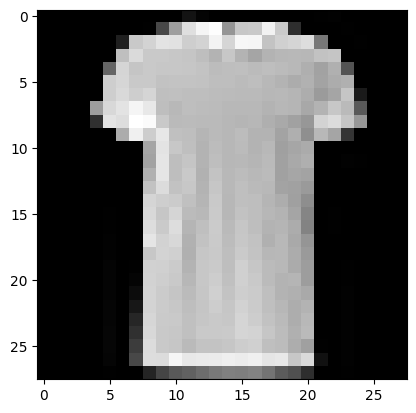

T-shirt/top


In [5]:
index = 17
plt.imshow(x_train[index] , cmap = 'gray')
plt.show()
print(class_name[y_train[index]])

### Details of dataset

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

# Preprocessing data

In [10]:
x_train.max()

np.uint8(255)

In [11]:
x_train.min()

np.uint8(0)

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Neural Network

In [14]:
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout

In [15]:
model = keras.models.Sequential()
model.add(Conv2D(filters = 32 , kernel_size = (3 , 3) , activation = 'relu' , padding = 'same' , strides = 1 , input_shape = (28 , 28 , 1)))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Conv2D(filters = 64 , kernel_size = (3 , 3) , activation = 'relu' , padding = 'same' , strides = 1))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Conv2D(filters = 128 , kernel_size = (3 , 3) , activation = 'relu' , padding = 'same' , strides = 1))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Flatten())
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 16 , activation = 'relu'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 10 , activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 405,498 (1.55 MB)

 Trainable params: 405,498 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer = tf.optimizers.Adagrad(learning_rate = 0.005) ,
              loss = tf.losses.CategoricalCrossentropy() ,
              metrics = [tf.metrics.CategoricalAccuracy()])

In [18]:
model.fit(x_train , y_train , epochs = 100 , batch_size = 32 , validation_split = 0.2 , verbose = 2)

Epoch 1/100
1500/1500 - 12s - 8ms/step - categorical_accuracy: 0.4513 - loss: 1.4429 - val_categorical_accuracy: 0.7449 - val_loss: 0.7338
Epoch 2/100
1500/1500 - 4s - 3ms/step - categorical_accuracy: 0.6709 - loss: 0.8659 - val_categorical_accuracy: 0.7768 - val_loss: 0.6033
Epoch 3/100
1500/1500 - 4s - 3ms/step - categorical_accuracy: 0.7209 - loss: 0.7395 - val_categorical_accuracy: 0.7965 - val_loss: 0.5373
Epoch 4/100
1500/1500 - 4s - 3ms/step - categorical_accuracy: 0.7502 - loss: 0.6735 - val_categorical_accuracy: 0.8121 - val_loss: 0.4962
Epoch 5/100
1500/1500 - 4s - 3ms/step - categorical_accuracy: 0.7715 - loss: 0.6195 - val_categorical_accuracy: 0.8251 - val_loss: 0.4682
Epoch 6/100
1500/1500 - 4s - 3ms/step - categorical_accuracy: 0.7825 - loss: 0.5892 - val_categorical_accuracy: 0.8309 - val_loss: 0.4489
Epoch 7/100
1500/1500 - 4s - 3ms/step - categorical_accuracy: 0.7947 - loss: 0.5685 - val_categorical_accuracy: 0.8449 - val_loss: 0.4380
Epoch 8/100
1500/1500 - 4s - 3ms/

In [20]:
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - categorical_accuracy: 0.9086 - loss: 0.2840


[0.277697890996933, 0.9081000089645386]

# Manual test

In [32]:
import numpy as np
from PIL import Image , ImageOps

img = Image.open('image.jpg')
img.thumbnail((28 , 28))
img = img.convert('L')
img = ImageOps.invert(img)
img = np.array(img).reshape(1 , 28 , 28)
img = img / 255


In [33]:
pred_img = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step


In [35]:
class_name[pred_img.argmax()]

'Shirt'